In [2]:
!pip install yfinance 
!pip install pandas
!pip install datetime
!pip install fbprophet
!pip install plotly

     |████████████████████████████████| 6.3MB 7.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=f36a9d034652cb0a6662532a1f9d9dbada71f1c6d49cfdfbe20354c165ce124a
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 256kB 10.5MB/s 


In [3]:
import yfinance as yf
import pandas as pd
import datetime
from datetime import date
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go

In [23]:
ticker_list = pd.read_csv('sample_data/ticker_symbol.csv')
n_years = 2
tickerSymbol = 'MSFT'
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2021, 7, 13)
period = n_years * 365
tickerData = yf.Ticker(tickerSymbol)

In [24]:

def load_data(ticker):
    data = yf.download(ticker, start_date, end_date)
    data.reset_index(inplace=True)
    return data

data = load_data(tickerSymbol)

def plot_raw_data():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name='stock_open'))
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name='stock_close'))
    fig.layout.update(title_text="Time Series Data", xaxis_rangeslider_visible=True)
    fig.show()

plot_raw_data()

[*********************100%***********************]  1 of 1 completed


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


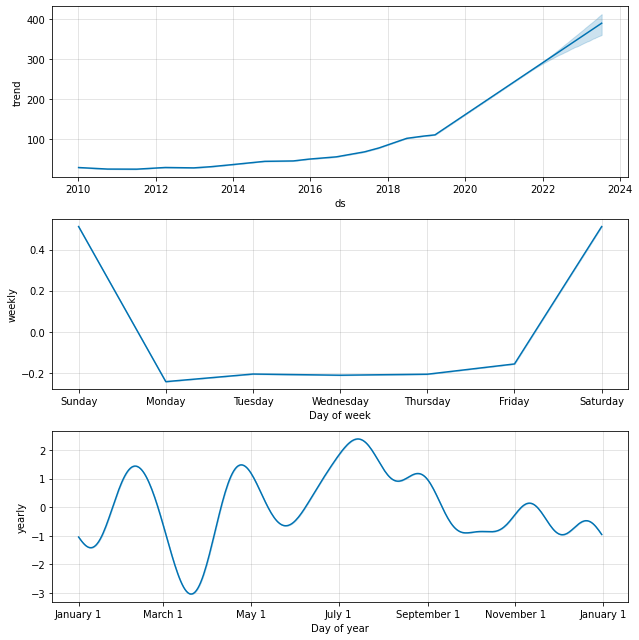

In [26]:
# Forecasting
df_train = data[['Date', 'Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

m = Prophet()
m.fit(df_train)

# create future dates of 365 days
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

forecast.tail()

fig1 = plot_plotly(m, forecast)
fig1.show()

# visualise each component [trends, yearly]
fig2 = m.plot_components(forecast)
fig2.show()

In [34]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days') #
df_cv.head()

INFO:fbprophet:Making 18 forecasts with cutoffs between 2012-02-25 00:00:00 and 2020-07-12 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-02-27,31.167488,30.462385,31.918048,31.350000,2012-02-25
1,2012-02-28,31.246180,30.522686,31.957952,31.870001,2012-02-25
2,2012-02-29,31.278883,30.531005,31.997252,31.740000,2012-02-25
3,2012-03-01,31.370897,30.620668,32.141655,32.290001,2012-02-25
4,2012-03-02,31.344235,30.613030,32.100988,32.080002,2012-02-25


In [35]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
4520,2021-07-06,222.646185,213.815935,230.685182,277.660004,2020-07-12
4521,2021-07-07,222.705137,214.036843,231.336268,279.929993,2020-07-12
4522,2021-07-08,222.832423,214.854159,231.874685,277.420013,2020-07-12
4523,2021-07-09,222.899785,214.517461,231.512899,277.940002,2020-07-12
4524,2021-07-12,223.065311,214.523801,231.775637,277.320007,2020-07-12


In [36]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,100.457651,10.022856,6.058438,0.063129,0.052008,0.264806
1,38 days,101.745772,10.086911,6.098523,0.063568,0.051628,0.263274
2,39 days,101.365716,10.068054,6.076098,0.063765,0.051628,0.258296
3,40 days,101.754748,10.087356,6.085443,0.064105,0.052305,0.249149
4,41 days,101.542464,10.076828,6.088197,0.064413,0.052544,0.240810


In [37]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,403.586581,20.089464,14.675911,0.158759,0.139552,0.449115
325,362 days,413.941823,20.345560,14.860576,0.160259,0.141048,0.452178
326,363 days,419.775518,20.488424,14.973941,0.161635,0.141683,0.453540
327,364 days,423.007764,20.567153,15.055626,0.162508,0.143452,0.450306
328,365 days,430.247796,20.742415,15.185214,0.162599,0.142597,0.445711


In [40]:
from fbprophet.plot import performance_metrics
df_p = performance_metrics(df_cv)
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-02-27,31.167488,30.462385,31.918048,31.350000,2012-02-25
1,2012-02-28,31.246180,30.522686,31.957952,31.870001,2012-02-25
2,2012-02-29,31.278883,30.531005,31.997252,31.740000,2012-02-25
3,2012-03-01,31.370897,30.620668,32.141655,32.290001,2012-02-25
4,2012-03-02,31.344235,30.613030,32.100988,32.080002,2012-02-25


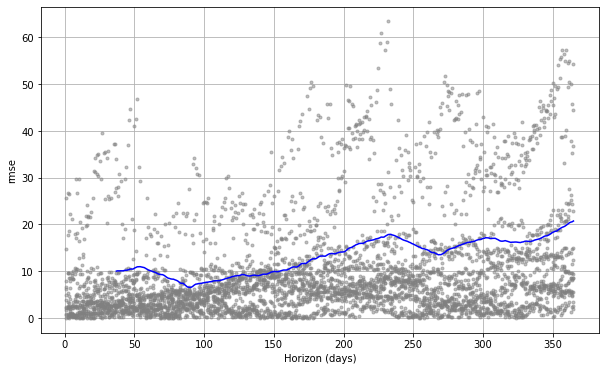

In [39]:
from fbprophet.plot import plot_cross_validation_metric
fig2 = plot_cross_validation_metric(df_cv, metric='rmse')